In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tyres-train/tyres_train.csv


# UPLOAD DATASET

In [138]:

data = pd.read_csv("/kaggle/input/tyres-train/tyres_train.csv", sep = ",")


     
data.head(30)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


# DATA OBSERVATION E PREPARATION

In [139]:
data.dtypes

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object

In [140]:
data.isnull().sum()
# the variable "diameter" is almost void --> impossible to proceed with substitution

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

In [141]:
#dropping all column "diameter" --> the majority is Nan

d="diameter"
data_dropped = data.drop(columns=d)

data_dropped.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0


In [142]:
data_dropped.isnull().sum()
# no more NaN observations

vulc               0
perc_nat_rubber    0
wiring_strength    0
weather            0
perc_imp           0
temperature        0
tread_type         0
tyre_season        0
elevation          0
month              0
tread_depth        0
tyre_quality       0
perc_exp_comp      0
add_layers         0
failure            0
dtype: int64

In [143]:
selection_categorical=['tread_type', 'tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality',
       'add_layers']
data_categorical=data_dropped[selection_categorical]
data_categorical.head()

,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers
0,0,1,8,0,1,1,1
1,2,0,11,1,1,0,1
2,0,0,0,1,1,0,1
3,1,0,7,3,1,1,1
4,0,1,2,2,2,0,1


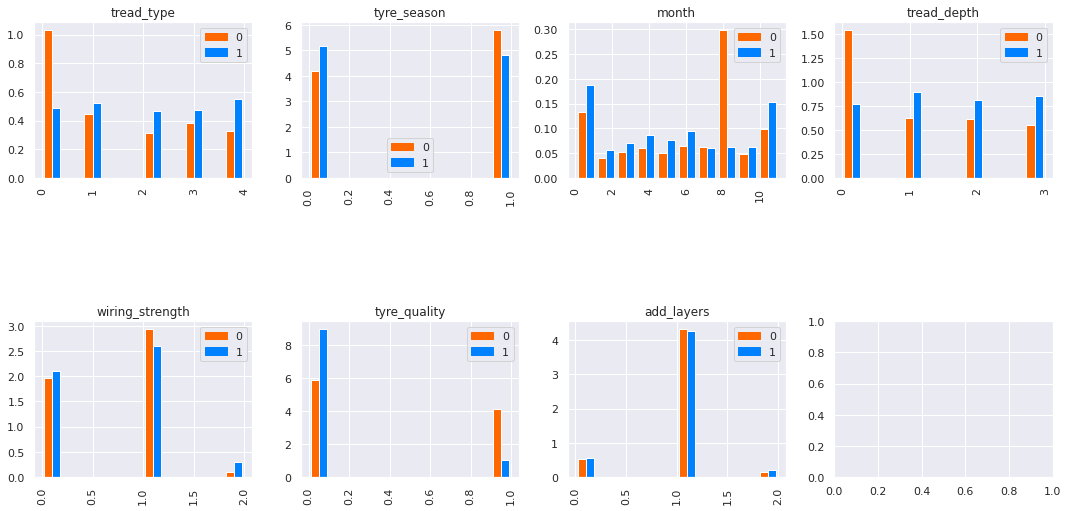

In [144]:
from matplotlib.patches import Rectangle

data_0=data_categorical[data_dropped['failure']==0] # records wih target==0
data_1=data_categorical[data_dropped['failure']==1] # records wih target==1

cmap = plt.get_cmap('jet')
col=[cmap(0.8),cmap(0.25)]
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in data_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([data_0[x],data_1[x]],density=True,color=col)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    handles = [Rectangle((0,0),1,1,color=c)for c in col]
    labels= ["0","1"]
    plt.legend(handles, labels)
    i+=1
plt.show()

# Create dummies with the OneHotEncoder method

In [145]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies=pd.concat([data_dummies,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)
    
data_dummies.head()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,add_layers_0,add_layers_1,add_layers_2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [146]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp','failure']
data_numerical=data_dropped[selection_numerical]
data_numerical.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,0


<AxesSubplot:>

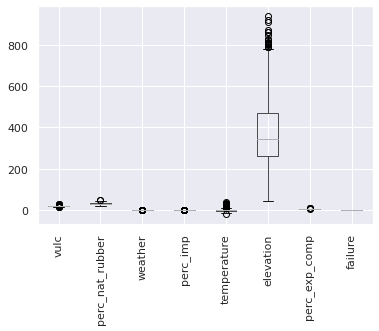

In [147]:
data_numerical.boxplot(rot=90)
# the scale of numerical variables is too different

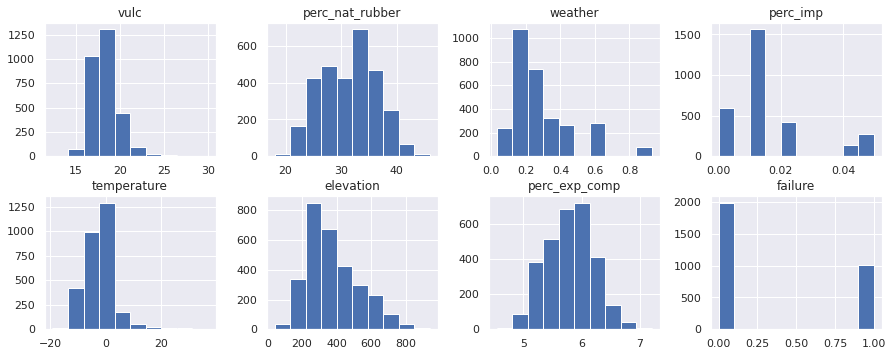

In [148]:
data_hist=data_numerical.hist(layout=(4,4), figsize=(15,12))
# we can try to normalize vulc, temperature and elevation

(1992, 8)
(1008, 8)


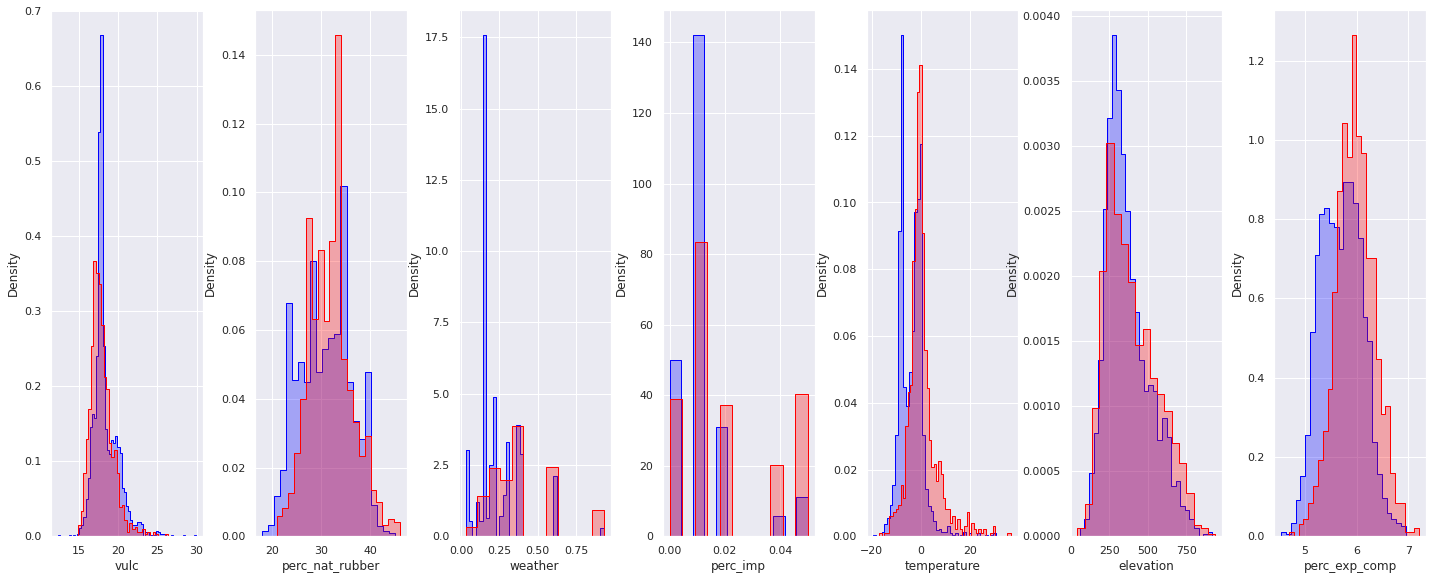

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

X0 = data_numerical[data_numerical['failure']==0]
X1 = data_numerical[data_numerical['failure']==1]
print(X0.shape)
print(X1.shape)
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(20,8))
fig.tight_layout()

data_num = data_numerical.iloc[:,0:-1]

for i, ax in zip(range(data_num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

In [150]:
from sklearn.preprocessing import StandardScaler

independent_variables=data_numerical.iloc[:,:-1] #no target

scaler = StandardScaler().fit(independent_variables) 
scaled_data = pd.DataFrame(scaler.transform(independent_variables))
scaled_data.columns = independent_variables.columns

In [151]:
# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

<AxesSubplot:>

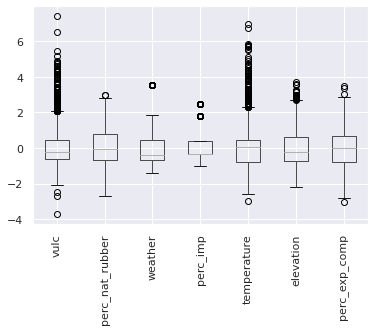

In [152]:
scaled_data.boxplot(rot=90)

In [153]:
# Create final dataset with all modifications and target variable included

df=pd.concat([data_dummies,scaled_data],axis=1)

df['failure']=data_dropped['failure']

df.tail()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,add_layers_1,add_layers_2,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
2995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.586827,-0.271809,1
2996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,-1.480129,0.045070,1
2997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.934222,-0.539937,0
2998,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.433093,1.165810,-1.380768,-1.020379,0.284834,-0.570284,0.240072,0
2999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.315301,0.354859,-1.217032,-1.020379,0.912563,0.190677,0.508200,0


# MODELS

## Separate train/test set

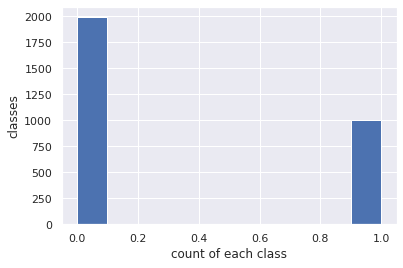

0    1992
1    1008
Name: failure, dtype: int64

In [154]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]

#Visualize Class Counts
plt.hist(y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df.failure.value_counts()
# the dataset is unbalanced --> we perform oversampling on the class 1 (oversampling because we have too little rows)

In [155]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 112) #fix random seed for replicability

print(X_train1.shape, X_test1.shape)

(2100, 38) (900, 38)


In [156]:
df_train=pd.concat([X_train1,y_train1],axis=1)
df_test=pd.concat([X_test1,y_test1], axis=1)

print(df_train.shape, df_test.shape)


(2100, 39) (900, 39)


In [157]:
#resample del train set
from sklearn.utils import resample

df_majority_train = df_train[df_train.failure==0]
df_minority_train = df_train[df_train.failure==1] 
 
df_minority_oversampled_train = resample(df_minority_train, 
                                   replace=True,
                                   n_samples=1394,     
                                   random_state=123)  

df_oversampled_train = pd.concat([df_minority_oversampled_train, df_majority_train])

df_oversampled_train.failure.value_counts()

1    1394
0    1394
Name: failure, dtype: int64

In [158]:
#Separate X and y on the new DataFrame
X_train=df_oversampled_train.iloc[:,0:-1]
y_train=df_oversampled_train.iloc[:,-1]

X_test = df_test.iloc[:,0:-1]
y_test = df_test.iloc[:,-1]

X_train.head()
y_train.head()


1718    1
528     1
847     1
73      1
1846    1
Name: failure, dtype: int64

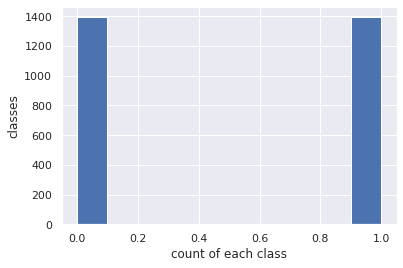

0    1394
1     706
Name: failure, dtype: int64

In [159]:

plt.hist(y_train)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df_train.failure.value_counts()


## Funzione per iperparametri


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [161]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred)))
    #print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

## Curva ROC

In [162]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## TREE

In [184]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [ 2, 3, 4, 5, 6],
              'min_samples_split': [4, 5, 7, 8,10],
              'min_samples_leaf': [4, 6, 7,10]}

hyperp_search(classifier,parameters)


f1_train: 0.759239 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 4}
f1         train 0.789   test 0.621

[[380 218]
 [ 68 234]]


In [164]:
model_Tree= DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 4, min_samples_split= 8)

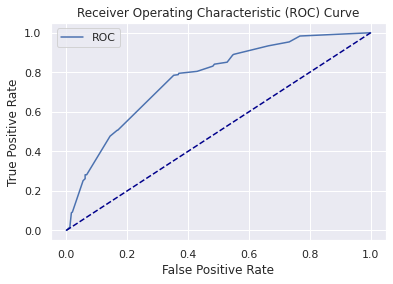

AUC: 0.77


In [165]:
#curva ROC
fpr1,tpr1=roc(model_Tree,X_train,y_train,X_test,y_test)

DEFINE GRIDSEARCH 

In [166]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [168]:
'''
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
'''

***RESULTS ON TRAIN SET***


NameError: name 'y_pred_train' is not defined

In [169]:
# Plot confusion matrix
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

NameError: name 'y_pred' is not defined

# Plotting tree


In [170]:
from sklearn import tree

text_representation = tree.export_text(model_Tree) #ok buono
print(text_representation)

|--- feature_33 <= -0.64
|   |--- feature_37 <= -0.55
|   |   |--- feature_32 <= -0.96
|   |   |   |--- class: 0
|   |   |--- feature_32 >  -0.96
|   |   |   |--- feature_31 <= 0.57
|   |   |   |   |--- feature_31 <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_31 >  0.19
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_31 >  0.57
|   |   |   |   |--- feature_36 <= -1.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_36 >  -1.03
|   |   |   |   |   |--- class: 0
|   |--- feature_37 >  -0.55
|   |   |--- feature_35 <= -1.34
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  0.50
|   |   |   |   |--- feature_36 <= -0.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_36 >  -0.78
|   |   |   |   |   |--- class: 0
|   |   |--- feature_35 >  -1.34
|   |   |   |--- feature_36 <= -1.11
|   |   |   |   |--- feature_36 <= -1.26
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feat

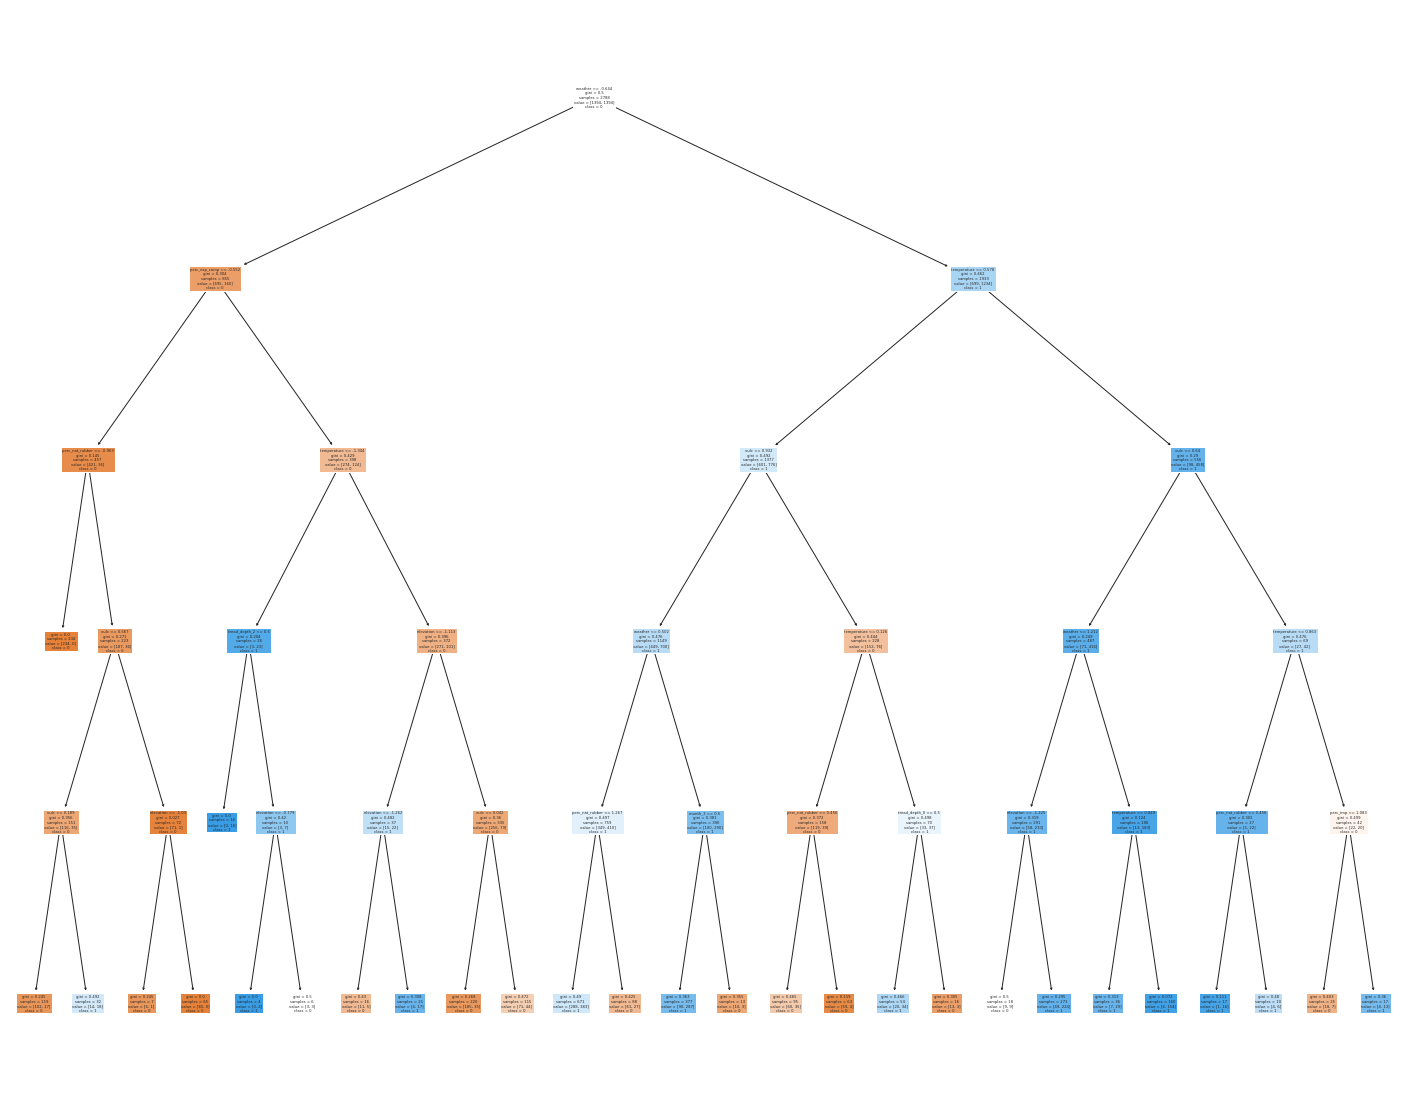

In [171]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_Tree, 
                   feature_names=X_test.columns.tolist(),  
                   class_names=['0','1'],
                   filled=True)

# RANDOM FOREST


In [185]:
from sklearn.ensemble import RandomForestClassifier


In [186]:
classifier= RandomForestClassifier()
parameters = {'n_estimators' :     np.arange(1,10,1),
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(1,6,1), 
              'min_samples_split': np.arange(1,10,1),
              'min_samples_leaf' : np.arange(1,10,1)
             };

hyperp_search(classifier,parameters)


KeyboardInterrupt: 

## KNN

In [187]:

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,10)}


In [188]:
hyperp_search(classifier,parameters)

f1_train: 0.717155 using {'n_neighbors': 110}
f1         train 0.708   test 0.623

[[412 186]
 [ 81 221]]


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=110)

#curva ROC
fpr2,tpr2=roc(model_knn,X_train,y_train,X_test,y_test)

## NAYVE BAYES

In [189]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

y_pred_train=model.predict(X_train)

from sklearn.metrics import f1_score

print("f1_score_test: ", f1_score(y_test, y_pred))

print("f1_score_train: ", f1_score(y_train, y_pred_train))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score_test:  0.5965834428383706
f1_score_train:  0.6964814205853337
[[366 232]
 [ 75 227]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70       598
           1       0.49      0.75      0.60       302

    accuracy                           0.66       900
   macro avg       0.66      0.68      0.65       900
weighted avg       0.72      0.66      0.67       900



In [ ]:
fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "penalty":['l2','none'], "max_iter":[100,1000,500] }


hyperp_search(classifier,parameters)

In [ ]:
model_Log = LogisticRegression(C=0.1, max_iter=100)

fpr4,tpr4=roc(model_Log,X_train,y_train,X_test,y_test)

In [ ]:
model_Log.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model_Log.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})


## SVM
--> pay attention: it takes a long time to run

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.01,0.1]} 

hyperp_search(classifier,parameters)

In [ ]:
model = SVC(C=0.01, kernel='rbf',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

## MULTI LAYER

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
#parameters = {"hidden_layer_sizes":[(5,3,2),(5,3),(10, 5)],  "max_iter": [1000,2000,5000,10000], "alpha": [0.001,0.1,10]}
parameters = {"hidden_layer_sizes":[(5, 1),(2,20,1)],  "max_iter": [1000], "alpha": [0.1,1]}
hyperp_search(classifier,parameters)    #    mega overfitting

In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.001, max_iter=5000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

# CHOICE OF THE MODEL

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# PREDICTIONS

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()